# 1. Goal of the Project
Throughout this project I am going to do the followings:

1. first i am going to **scrap** the IMDB website to get the data of the vedio-games 
2. second i going to analysie the obtained data thruogh the visulization technique as *matplotlib*

# 2. scarping the Vedio-game data from IMDB

## 2.1 Importing the required packages for scrapping

In [3]:
from bs4 import BeautifulSoup
import requests
import openpyxl
import numpy as np
import matplotlib.pyplot as plt

## 2.2 Creating an empty Excel file

In [ ]:
#CREATING AN EXCEL FILE
excel       = openpyxl.Workbook() 
sheet       = excel.active
sheet.title = 'Top Vedio Games'
sheet.append(['Index','Title','Year of Release','Run-time','IMDB Rating','No. Of Votes','Adventure','Action','Comedy','Crime','Drama','History','Horror','Family','Fantasy','Mystery','Sci-Fi','Sport'])

## 2.3 Adding the data values in the Excel file thruogh scrraped data

In [12]:
pages = np.arange(1,10000,50)

for k in pages:
    if k!=1:
        url = f"https://www.imdb.com/search/title/?title_type=video_game&sort=boxoffice_gross_us,asc&start={k}&ref_=adv_nxt"
    else:
        url = "https://www.imdb.com/search/title/?title_type=video_game&sort=boxoffice_gross_us,asc"
        
    try:
        source = requests.get(url)
        source.raise_for_status()

        soup = BeautifulSoup(source.text,'html.parser')
        #print(soup)

        vedio_games = soup.find('div',class_="lister-list")
        vedio_games = vedio_games.find_all('div',class_="lister-item mode-advanced")
        #print(len(vedio_games))
        for vedio_game in vedio_games:
            
            ##1 Extracting the Index of the Vedio game
            rank        = vedio_game.find('span',class_='lister-item-index unbold text-primary').text.split('.')[0]
            if len(rank)>3:
                rank = rank.replace(",", "")
            else:
                rank = rank
            
            rank        = int(rank)

            
            ##2 Extracting the title of the vedio game
            name        = vedio_game.find('h3',class_="lister-item-header")
            name        = name.a.text


            ##3 Extracting the releasing year of the vedio game
            year        = vedio_game.find('span',class_="lister-item-year text-muted unbold").text

            if len(year)==17:
                year = year.split(' ')[0].split('(')[1]
            else:
                year = year.split(' ')[1].split('(')[1]

            year = int(year)
            
            
            
            ##4 Extracting the run-time of the vedio game
            runtime     = vedio_game.find('span',class_="runtime")
            if runtime==None:
                runtime = "NA"
            else:
                runtime = int(runtime.text.split(' ')[0])


            ##5 Extracting the Genre type of the vedio game
            genre       = vedio_game.find('span',class_="genre")
            if genre==None:
                genre = "NA"
            else:
                genre = genre.text.split(',')

            if genre=='NA':
                genre = ["XXXX"]
            else:
                if len(genre)==1:
                    genre[0]=genre[0].split('\n')[1].split(' ')[0]
                else:
                    for j in range(len(genre)):
                        if j==0:
                            genre[j] = genre[0].split('\n')[1]
                        else:
                            genre[j] = genre[j].split(' ')[1]


            genre_list = ['Adventure','Action','Comedy','Crime','Drama','History','Horror','Family','Fantasy','Mystery','Sci-Fi','Sport']

            for i in range(len(genre_list)):
                if genre_list[i] in genre:
                    genre_list[i] = 1
                else:
                    genre_list[i] = 0


            ##6 EXTRACTING THE IMDB-RATING
            rating      = vedio_game.find('div',class_="inline-block ratings-imdb-rating")
            if rating==None:
                rating  = "NA"
            else:
                rating  = float(rating.text)


            
            ##7 EXTRACTING THE NUMBER OF VOTES
            votes       = vedio_game.find('p',class_="sort-num_votes-visible")
            if votes==None:
                votes   = "NA"
            else:
                votes = votes.text.split('|')[0].split(':')[1].split('\n')[1]
                votes = votes.replace(",", "")
                votes = int(votes)

            
            ##8 Extracting the Directors of the vedio game

            #director     = vedio_game.find('p',class_="").text.split('|')[0]
            #print(director)


            sheet.append([rank,name,year,runtime,rating,votes,genre_list[0],genre_list[1],genre_list[2],genre_list[3],genre_list[4],genre_list[5],genre_list[6],genre_list[7],genre_list[8],genre_list[9],genre_list[10],genre_list[11]])

            

    except Exception as e:
        print(e)

## 2.4 Saving the Excel file in the system

In [3]:
excel.save('Top Vedio Games_start10000.xlsx')

# 3. Performing the Explroratory Data Analysis

In this Section we going to perform the Exporatory Data Analysis on the obtained data of vedio-games. In this section we mainly
do the following things:

- import the data
- checking for the null values 
- cleansing of the data
- visiualise the data through a visulization package ***matplotlib***

## 3.1 Importing the Excel file 

In [10]:
import pandas as pd
data = pd.read_excel("Top Vedio Games_start20000.xlsx")

In [11]:
print(data.head())

   Index                              Title  Year of Release  Run-time  \
0      1  Mr. Payback: An Interactive Movie             1995      30.0   
1      2      Gettysburg: Civil War Battles             2002       NaN   
2      3       MysteryDisc: Murder, Anyone?             1982       NaN   
3      4  MysteryDisc: Many Roads to Murder             1983       NaN   
4      5                         Night Trap             1992       NaN   

   IMDB Rating  No. Of Votes  Adventure  Action  Comedy  Crime  Drama  \
0          4.7         103.0          1       0       1      0      0   
1          2.1          11.0          1       1       0      0      0   
2          6.1          38.0          1       0       0      1      0   
3          NaN           NaN          1       0       0      1      0   
4          6.3         366.0          1       0       0      0      0   

   History  Horror  Family  Fantasy  Mystery  Sci-Fi  Sport  
0        0       0       0        0        0       1  

In [12]:
print(data.shape)

(18462, 18)


In [13]:
print(data.columns)

Index(['Index', 'Title', 'Year of Release', 'Run-time', 'IMDB Rating',
       'No. Of Votes', 'Adventure', 'Action', 'Comedy', 'Crime', 'Drama',
       'History', 'Horror', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi', 'Sport'],
      dtype='object')


In [14]:
print(data.dtypes)

Index                int64
Title               object
Year of Release      int64
Run-time           float64
IMDB Rating        float64
No. Of Votes       float64
Adventure            int64
Action               int64
Comedy               int64
Crime                int64
Drama                int64
History              int64
Horror               int64
Family               int64
Fantasy              int64
Mystery              int64
Sci-Fi               int64
Sport                int64
dtype: object


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18462 entries, 0 to 18461
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            18462 non-null  int64  
 1   Title            18462 non-null  object 
 2   Year of Release  18462 non-null  int64  
 3   Run-time         660 non-null    float64
 4   IMDB Rating      15085 non-null  float64
 5   No. Of Votes     15085 non-null  float64
 6   Adventure        18462 non-null  int64  
 7   Action           18462 non-null  int64  
 8   Comedy           18462 non-null  int64  
 9   Crime            18462 non-null  int64  
 10  Drama            18462 non-null  int64  
 11  History          18462 non-null  int64  
 12  Horror           18462 non-null  int64  
 13  Family           18462 non-null  int64  
 14  Fantasy          18462 non-null  int64  
 15  Mystery          18462 non-null  int64  
 16  Sci-Fi           18462 non-null  int64  
 17  Sport       

## 3.2 Checking for the null Values

In [16]:
data.isna().sum()

Index                  0
Title                  0
Year of Release        0
Run-time           17802
IMDB Rating         3377
No. Of Votes        3377
Adventure              0
Action                 0
Comedy                 0
Crime                  0
Drama                  0
History                0
Horror                 0
Family                 0
Fantasy                0
Mystery                0
Sci-Fi                 0
Sport                  0
dtype: int64

### Interpretataion:
Now it should be noted that 
- The **Run-time** column has most of the values as null(about**96.43%**), so we can not use this column in our analysis, therefore we have to drop that column
- Also there are **3377** null values in the IMDB Rating and No. Of Votes columns each, threfore we have to drop those recored also from the data, as follows:

In [17]:
## Droping the Run-time column
data = data.drop(['Run-time'],axis = 1)

In [18]:
data.head()

,Index,Title,Year of Release,IMDB Rating,No. Of Votes,Adventure,Action,Comedy,Crime,Drama,History,Horror,Family,Fantasy,Mystery,Sci-Fi,Sport
0,1,Mr. Payback: An Interactive Movie,1995,4.7,103.0,1,0,1,0,0,0,0,0,0,0,1,0
1,2,Gettysburg: Civil War Battles,2002,2.1,11.0,1,1,0,0,0,1,0,0,0,0,0,0
2,3,"MysteryDisc: Murder, Anyone?",1982,6.1,38.0,1,0,0,1,0,0,0,0,0,1,0,0
3,4,MysteryDisc: Many Roads to Murder,1983,NaN,NaN,1,0,0,1,0,0,0,0,0,1,0,0
4,5,Night Trap,1992,6.3,366.0,1,0,0,0,0,0,1,0,0,1,0,0


In [19]:
## Droping the NA values 
data = data.dropna()

In [20]:
data

,Index,Title,Year of Release,IMDB Rating,No. Of Votes,Adventure,Action,Comedy,Crime,Drama,History,Horror,Family,Fantasy,Mystery,Sci-Fi,Sport
0,1,Mr. Payback: An Interactive Movie,1995,4.7,103.0,1,0,1,0,0,0,0,0,0,0,1,0
1,2,Gettysburg: Civil War Battles,2002,2.1,11.0,1,1,0,0,0,1,0,0,0,0,0,0
2,3,"MysteryDisc: Murder, Anyone?",1982,6.1,38.0,1,0,0,1,0,0,0,0,0,1,0,0
4,5,Night Trap,1992,6.3,366.0,1,0,0,0,0,0,1,0,0,1,0,0
5,6,Gabriel Knight: Sins of the Fathers,1993,9.1,697.0,1,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18455,44,Dark Seed II,1995,6.4,62.0,0,0,0,0,0,0,1,0,0,1,1,0
18456,45,DuckTales: The Quest for Gold,1990,7.8,91.0,1,1,1,0,0,0,0,0,0,0,0,0
18457,46,"I Have No Mouth, and I Must Scream",1995,8.3,261.0,0,0,0,0,0,0,1,0,0,0,1,0
18458,47,Noir,1996,8.6,29.0,1,0,0,1,0,0,0,0,0,1,0,0


In [21]:
## CREATING the Decade column
# Let's create a decade column to show the decade when the game was launched
data['decade'] = np.floor(data['Year of Release']//10)*10
data.decade.head(10)

0     1990.0
1     2000.0
2     1980.0
4     1990.0
5     1990.0
6     1990.0
8     1990.0
9     1990.0
10    1990.0
11    1990.0
Name: decade, dtype: float64

In [22]:
data.head()

,Index,Title,Year of Release,IMDB Rating,No. Of Votes,Adventure,Action,Comedy,Crime,Drama,History,Horror,Family,Fantasy,Mystery,Sci-Fi,Sport,decade
0,1,Mr. Payback: An Interactive Movie,1995,4.7,103.0,1,0,1,0,0,0,0,0,0,0,1,0,1990.0
1,2,Gettysburg: Civil War Battles,2002,2.1,11.0,1,1,0,0,0,1,0,0,0,0,0,0,2000.0
2,3,"MysteryDisc: Murder, Anyone?",1982,6.1,38.0,1,0,0,1,0,0,0,0,0,1,0,0,1980.0
4,5,Night Trap,1992,6.3,366.0,1,0,0,0,0,0,1,0,0,1,0,0,1990.0
5,6,Gabriel Knight: Sins of the Fathers,1993,9.1,697.0,1,0,0,0,1,0,1,0,0,0,0,0,1990.0


## 3.4 Visuliasing the data 

### Game production per decade
The production of games has been increasing steadily in each decade. The 1940s, 50s, and 60s had the lowest number of games with one, two and three respectively. The 2020 decade has barely started and the number of games is almost exceeding those produced in the 80s. 

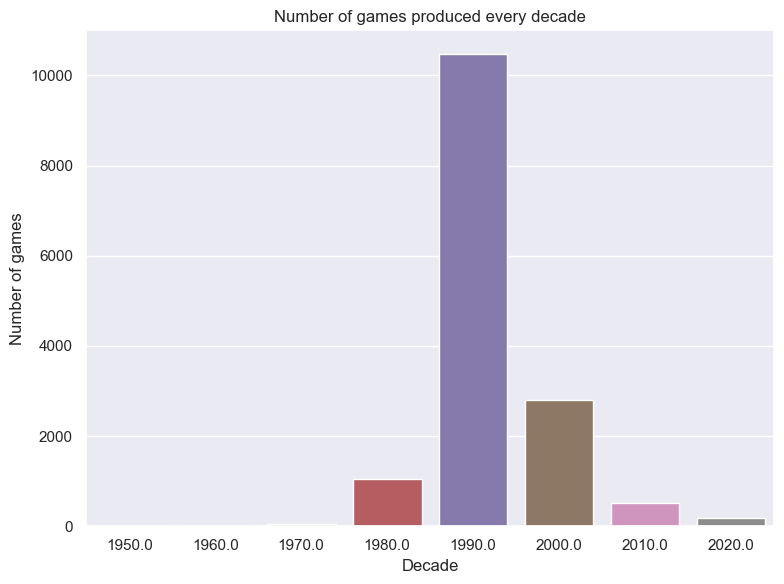

In [23]:
import seaborn as sns
# Visualize the number of games for each decade using a countplot
sns.set()
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='decade',data=data)
ax.set(title='Number of games produced every decade', xlabel='Decade',ylabel='Number of games')
plt.tight_layout()
plt.show()

### Interpretataion :
From the above plot showing the count of games during the different decades, we can interprete that most of the video games were launched during the 1990 followed by 2000, 1980 and 2010.


## Variation in IMDb rating over the decade

<AxesSubplot:xlabel='Year of Release'>

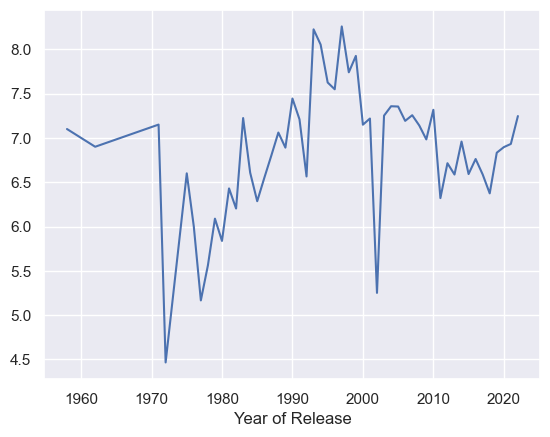

In [24]:
s1=data.groupby('Year of Release')['IMDB Rating'].mean()
s1.plot()

## Variation in number of votes over the decade



<AxesSubplot:xlabel='Year of Release'>

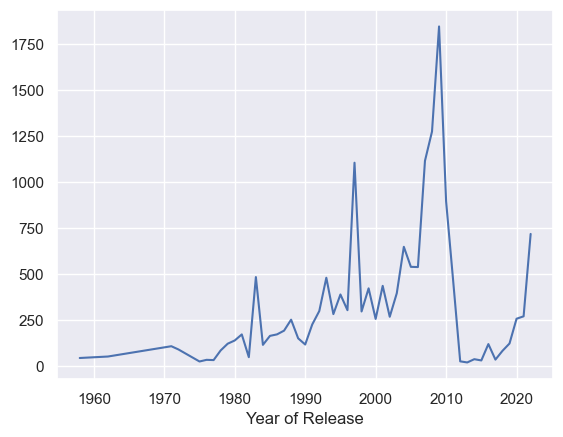

In [25]:
s1=data.groupby('Year of Release')['No. Of Votes'].mean()
s1.plot()


## Distribution of ratings

The games ratings are skewed to the left with majority of ratings (1 to 6) falling to the left of the mean. The mean is also to the left of the median



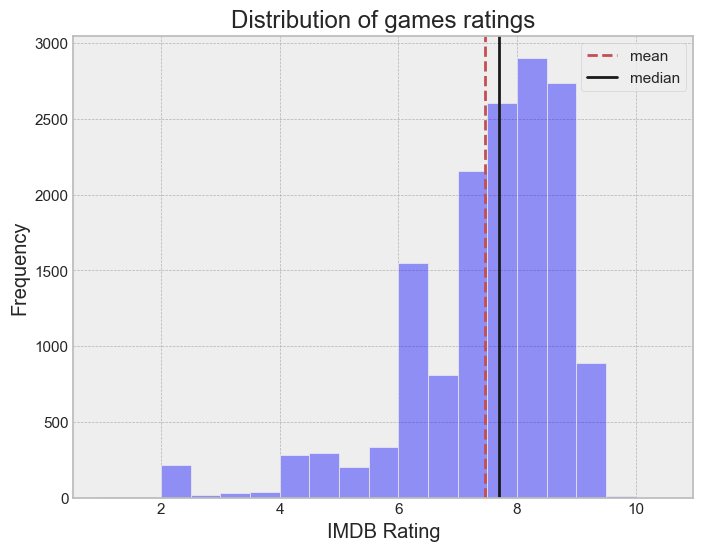

In [30]:
# Visualize the distribution or rating
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x='IMDB Rating',data=data,bins=np.arange(1,11,0.5),ax=ax,alpha=0.4)
plt.axvline(data['IMDB Rating'].mean(),color='r',ls='--',label='mean')
plt.axvline(data['IMDB Rating'].median(),color='k',ls='-',label='median')
plt.title('Distribution of games ratings')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Correlation between average IMDb ratings and the time 

Has the average rating of video games changed or remained constant over the years?

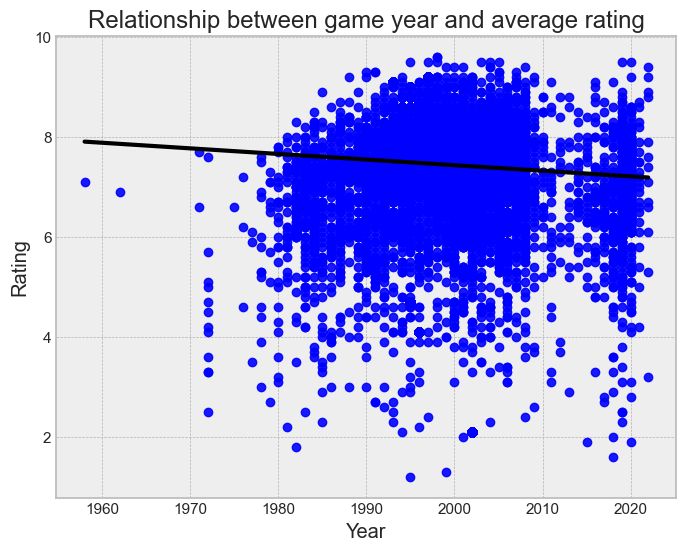

In [37]:
fig, ax = plt.subplots(figsize=(8,6))
sns.regplot(x='Year of Release',y='IMDB Rating',data=data,color='blue',line_kws={'color':'black'},ci=None,scatter_kws={'marker':'s','alpha':0.9})
ax.set(title='Relationship between game year and average rating',xlabel='Year',ylabel='Rating')
plt.show()

### Interpretation:

From the above scatter plot, it can be seen that, there is a slightly negative relationship between the relaesing year of the game and the average IMDb rating. 

## Realtionship between Number of Votes and the IMDb rating

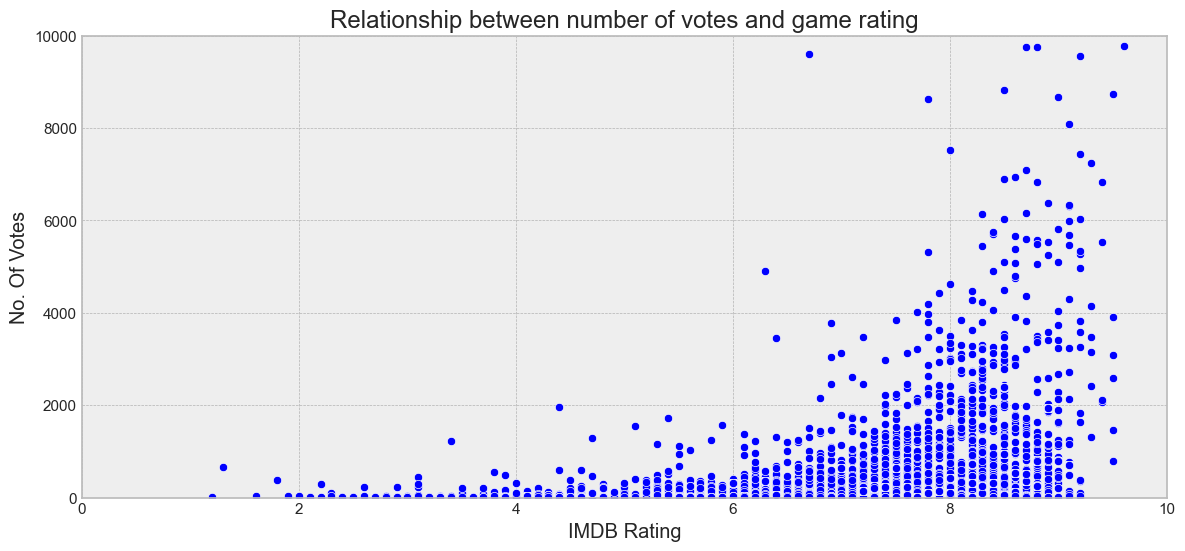

In [44]:
# Relationship between the number of votes and rating
fig, ax = plt.subplots(figsize=(14,6),)
sns.scatterplot(x='IMDB Rating',y='No. Of Votes',data=data,color='blue',alpha=1)
ax.set(ylim = [0,10000],xlim=[0,10], title='Relationship between number of votes and game rating')
plt.show()

### Interpretation:

From the above scatter plot of IMDb rating Vs Number of votes, it can be easily interpreted that, the relationship between IMDb rating and Number of votes is **NOT LINEAR**, Actually it is a **PARABOLIC**.

## Relationship between log(IMDB Rating) AND log(NO. Of Votes)

Now Since, the relationship between IMDb rating and Number of votes is NOT LINEAR, therefore, let us transform the variables and then try to find out the new relatioship as follows:

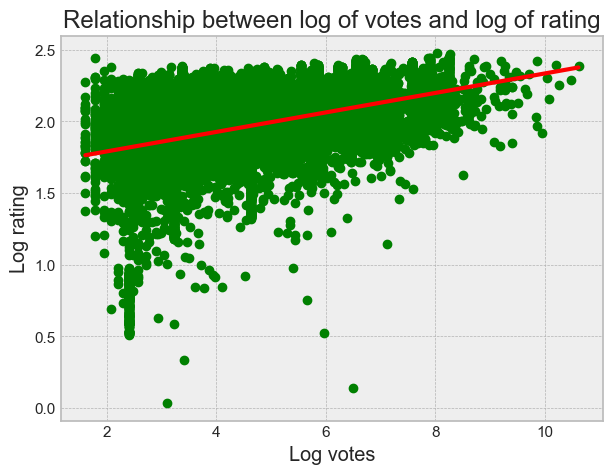

In [70]:
# Transform the variables
data['rating_log'] = np.log(data['IMDB Rating'])
data['votes_log'] = np.log(data['No. Of Votes'])

# Get the standard deviation of rating cubed to add noise to the scatterplot
games_rating_log_std = data.rating_log.std()

# Visualize the relationship of transformed variables
fig, ax = plt.subplots(figsize=(7,5))
sns.regplot(x='votes_log',y='rating_log',data=data,color='green',ci=None,
            y_jitter=games_rating_log_std,line_kws={'color':'red'},scatter_kws={'alpha':1})
ax.set(title='Relationship between log of votes and log of rating',xlabel='Log votes',ylabel='Log rating')
#plt.ylim([0,1100])
plt.show()

### Interpretation:

From the above plot, it can be interoreted that, there is a **linear relationship** between the **log(IMDB Rating)** amd the **log(No. Of Votes)**, thus The simple linear regression can be used to predict the imdb rating of a vedio game based on the number of votes it has.

## Analysis of the Vedio Games based on the genre



### Genres with most games in our Dataset:

Now let us find out that, which genre is the most common in our dataset

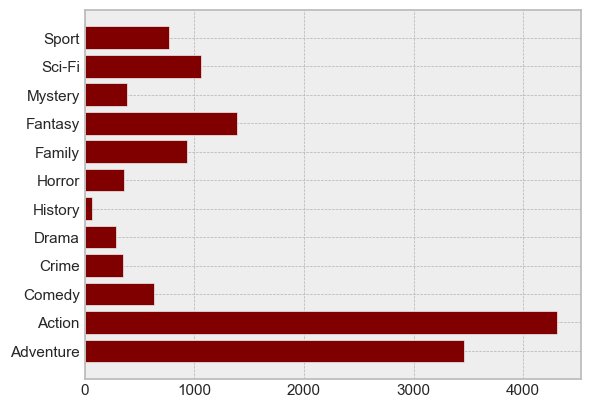

In [68]:
## Counting the number of games with a particular type of genres 

genre_list = ['Adventure','Action','Comedy','Crime','Drama','History','Horror','Family','Fantasy','Mystery','Sci-Fi','Sport']
count = [3456,4308,631,351,288,64,363,937,1387,387,1063,768]

plt.barh(genre_list, count, color = 'maroon')
plt.xlabel = 'No. of Vedio games'
plt.ylabel = 'Types of Genre '
plt.title = "Game count by Genre"
plt.show()

## Interpretation:
 
 From the above barplot showing the Game count by genres in our data set, it can be concluded that, the most common genre is **Action** followed by **Adventure**, **Fantasy** and **Sci-Fi**, Also the least used genre is **History**  in our scrapped dataset.